### Find the most important features

In [1]:
#Import relevant packages:
import sklearn.ensemble
import sklearn.multiclass
import sklearn.model_selection
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#Read in preprocessed dataframes:
featureDf = pd.read_pickle('./processed.files/labelled/featureDf')
labelledDf = pd.read_pickle('./processed.files/labelled/labelledDf')

#Read in preprocessed numpy arrays:
preProcFeats = np.load('./processed.files/labelled/features.npy')
preProcLabels = np.load('./processed.files//labelled/labels.npy')

#Define the shuffling k-fold: - unecessary
#k_fold = sklearn.model_selection.StratifiedKFold(n_splits=3, shuffle=True)

#Use the RandomForest method for the OneVsRestClassifier and specify hyper-parameters:
randForest = sklearn.multiclass.OneVsRestClassifier(sklearn.ensemble.RandomForestClassifier())

clf = sklearn.multiclass.OneVsRestClassifier(estimator=sklearn.ensemble.RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=80, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          n_jobs=1)

#Fit the model using the full data set and pull the names of the features as strings from the dataframe:
fitmodel = clf.fit(preProcFeats, preProcLabels)

featureStrs = featureDf.columns.values

fimps = []
features = []

#Create a list with each element one of the feature importance arrays for one of the estimators:
for idx in np.arange(8):
    importance = fitmodel.estimators_[idx].feature_importances_
    fimps.append(importance)
    
featureidxs = np.array([])

for i in np.arange(10):
    
    #Append next highest importance features to new features array & force feature to be ignored for :
    for idx in np.arange(8):
        fimp = fimps[idx]
        maxargs = np.argmax(fimp)
        maxargs = maxargs.astype(int)
        featureidxs = np.append(featureidxs, maxargs).astype(int)    
        fimp[maxargs] = -1
        fimps[idx] = fimp                
    
#Make sure no feature indices are repeated & create new feature list:
featureidxs = np.unique(featureidxs).astype(int)
featurez = featureStrs[featureidxs]
print featurez
    
#print features   

['MJDstart' 'bestDM' 'bestSNR' 'BinFactor' 'Events' 'DMmax' 'DMmean'
 'DMmedian' 'SNRmean' 'SNRmedian' 'SNRstd' 'MJDstd' 'pctZeroDeriv'
 'longestRun0' 'longestRun2' 'globtsStatsStd' 'globtsStatsPosCnt'
 'globtsStatsMin' 'globtsStatsNegCnt' 'globtsStatsMean'
 'globDedisptsStatsStd' 'globDedisptsStatsPosCnt' 'globDedisptsStatsMin'
 'globDedisptsStatsNegCnt' 'globDedisptsStatsRatio1'
 'globDedisptsStatsMean' 'windTimeStatsStd1' 'windTimeStatsStd2'
 'windTimeStatsStd5' 'windTimeStatsStd7' 'windTimeStatsStd8'
 'windTimeStatsStd12' 'windTimeStatsStd14' 'windTimeStatsStd15'
 'windDedispTimeStatsStd15' 'windDedispTimeStatsMax4'
 'windDedispTimeStatsSnr15' 'pixelsMax42' 'pixelsMax43' 'pixelsMax53'
 'pixelsMax63' 'pixelsMax83' 'pixelsMax93' 'pixelsMax103' 'pixelsMax112'
 'pixelsMax143' 'pixelsMin113' 'pixelsMin143' 'pixelsMin153' 'pixelsMean60'
 'relMJDmean']


## Plot a stacked histogram with each class a different colour

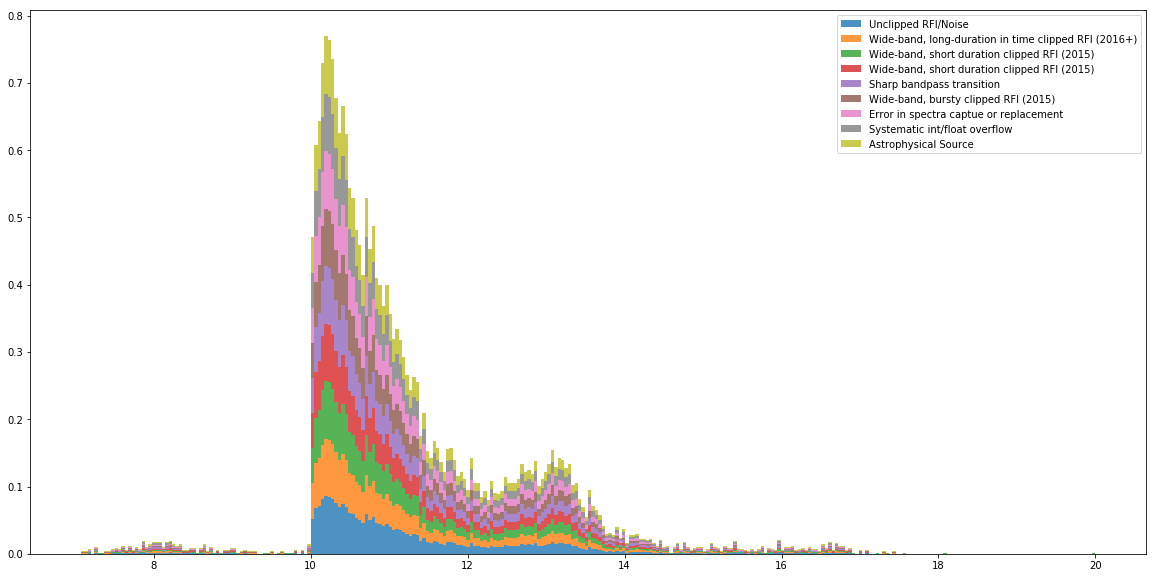

In [23]:
labels = np.array([1,2,3,4,5,6,7,9])

featarr = np.array([])

for label in labels:
    ndf = labelledDf[labelledDf['Label'] == label]

    featcol = labelledDf.as_matrix(columns=['MJDstart'])

    if label == 1:
        featarr = featcol

    featarr = np.c_[featarr, featcol]

labellegend = 'Unclipped RFI/Noise', 'Wide-band, long-duration in time clipped RFI (2016+)', 'Wide-band, short duration clipped RFI (2015)', 'Wide-band, short duration clipped RFI (2015)', 'Sharp bandpass transition', 'Wide-band, bursty clipped RFI (2015)', 'Error in spectra captue or replacement', 'Systematic int/float overflow', 'Astrophysical Source'

plt.figure(figsize=(20,10))
plt.hist(featarr, bins = 300, normed = True, stacked = True, alpha = 0.8, label=labellegend)
#plt.yscale('log')
plt.legend()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fba07cc8f10>]], dtype=object)

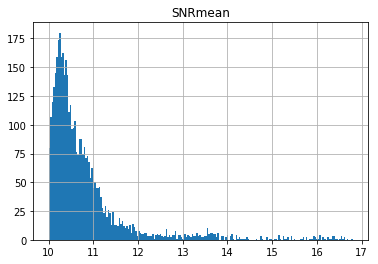

In [48]:
labelDf = labelledDf[labelledDf['Label'] == 2]

#print labelDf['pctZeroDeriv'].mean()

labelDf.hist(column = 'SNRmean', bins = 200)  # s is an instance of Se

#plt.title('Percentage of Class 2 Time Series with Zero Gradient')

#plt.savefig('./important.feature.histograms/pctzerodivc2.png')



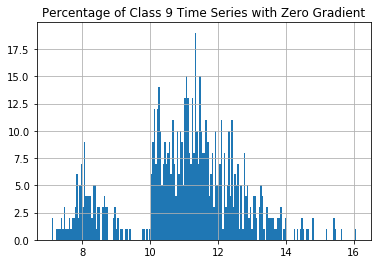

In [50]:
labelDf = labelledDf[labelledDf['Label'] == 9]

#print labelDf['SNRmean'].mean()

labelDf.hist(column = 'SNRmean', bins = 200) 
plt.title('Percentage of Class 9 Time Series with Zero Gradient')
#plt.ylim((0,25))
#plt.savefig('./important.feature.histograms/pctzerodivc9.png')

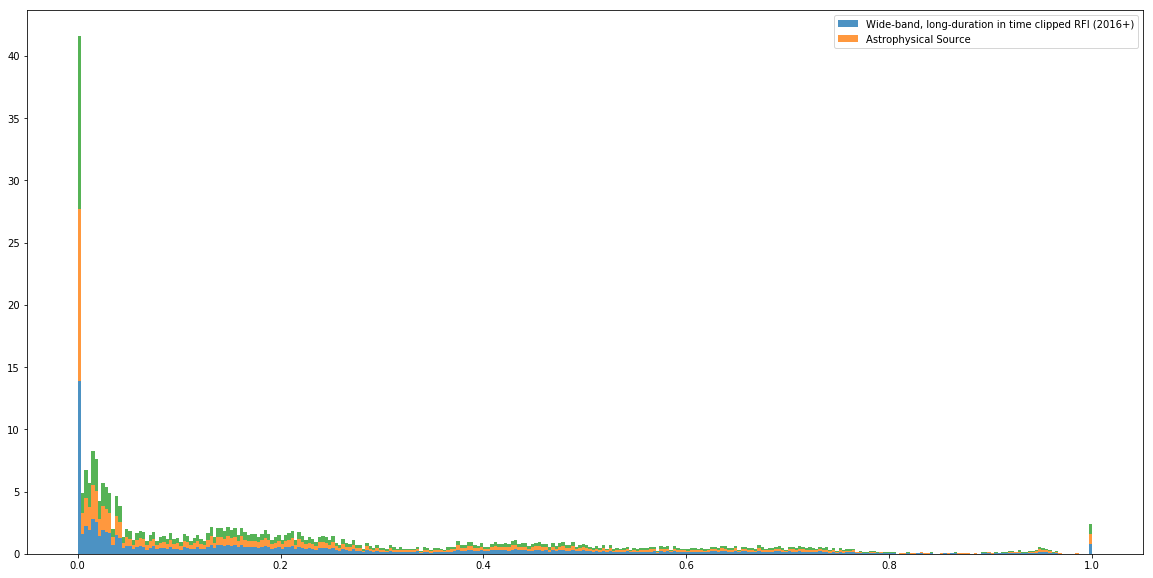

In [22]:
labels = np.array([1,9])

featarr = np.array([])

for label in labels:
    ndf = labelledDf[labelledDf['Label'] == label]

    featcol = labelledDf.as_matrix(columns=['pctZeroDeriv'])

    if label == 1:
        featarr = featcol

    featarr = np.c_[featarr, featcol]

labellegend = 'Wide-band, long-duration in time clipped RFI (2016+)', 'Astrophysical Source'

plt.figure(figsize=(20,10))
plt.hist(featarr, bins = 300, normed = True, stacked = True, alpha = 0.8, label=labellegend)
#plt.yscale('log')
plt.legend()